# HW 7 BDS4440

# Analyzing a data set: AMES IOWA Real Estate Data

Go to the Kaggle site: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
and download the AMES Iowa data set

In [53]:
import pandas as pd

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Problem 1: 

There is one feature that is aboslutely useless in predicting the sale price of the home. Find it and drop it from both the train and test sets. Look at the names of the features and it should be somewhat obvious what that feature is in contrast to the rest of the features.

In [12]:
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

# Problem 2: 

There Seperate the categorical features from numericals. Do this in only a few lines of code (less than 10 lines of code).

The net out put should be two lists for the feature names:

* `categorical=[featureA, featureB,...]`
* `numerical=[feactureX, featureY,...]`


* Be sure to exclude Sale price because it is not a predicting feature (its the target!)

In [34]:
categorical = []
numerical = []
for i in train.columns:
    if i=='SalePrice':
        pass
    elif train[i].dtype=='O':
        categorical.append(i)
    else:
        numerical.append(i)

# Problem 3: 
For each numerical feature, plot the scatter plot of the feature versus the target (SalePrice). Use the techniques from the lectures to plot an ordinary least squares regression line to that feature. Put these plots into  a series of subplots.

For the subplots use `plt.subplots(nrows=12, ncols=3, figsize=(20, 80))`

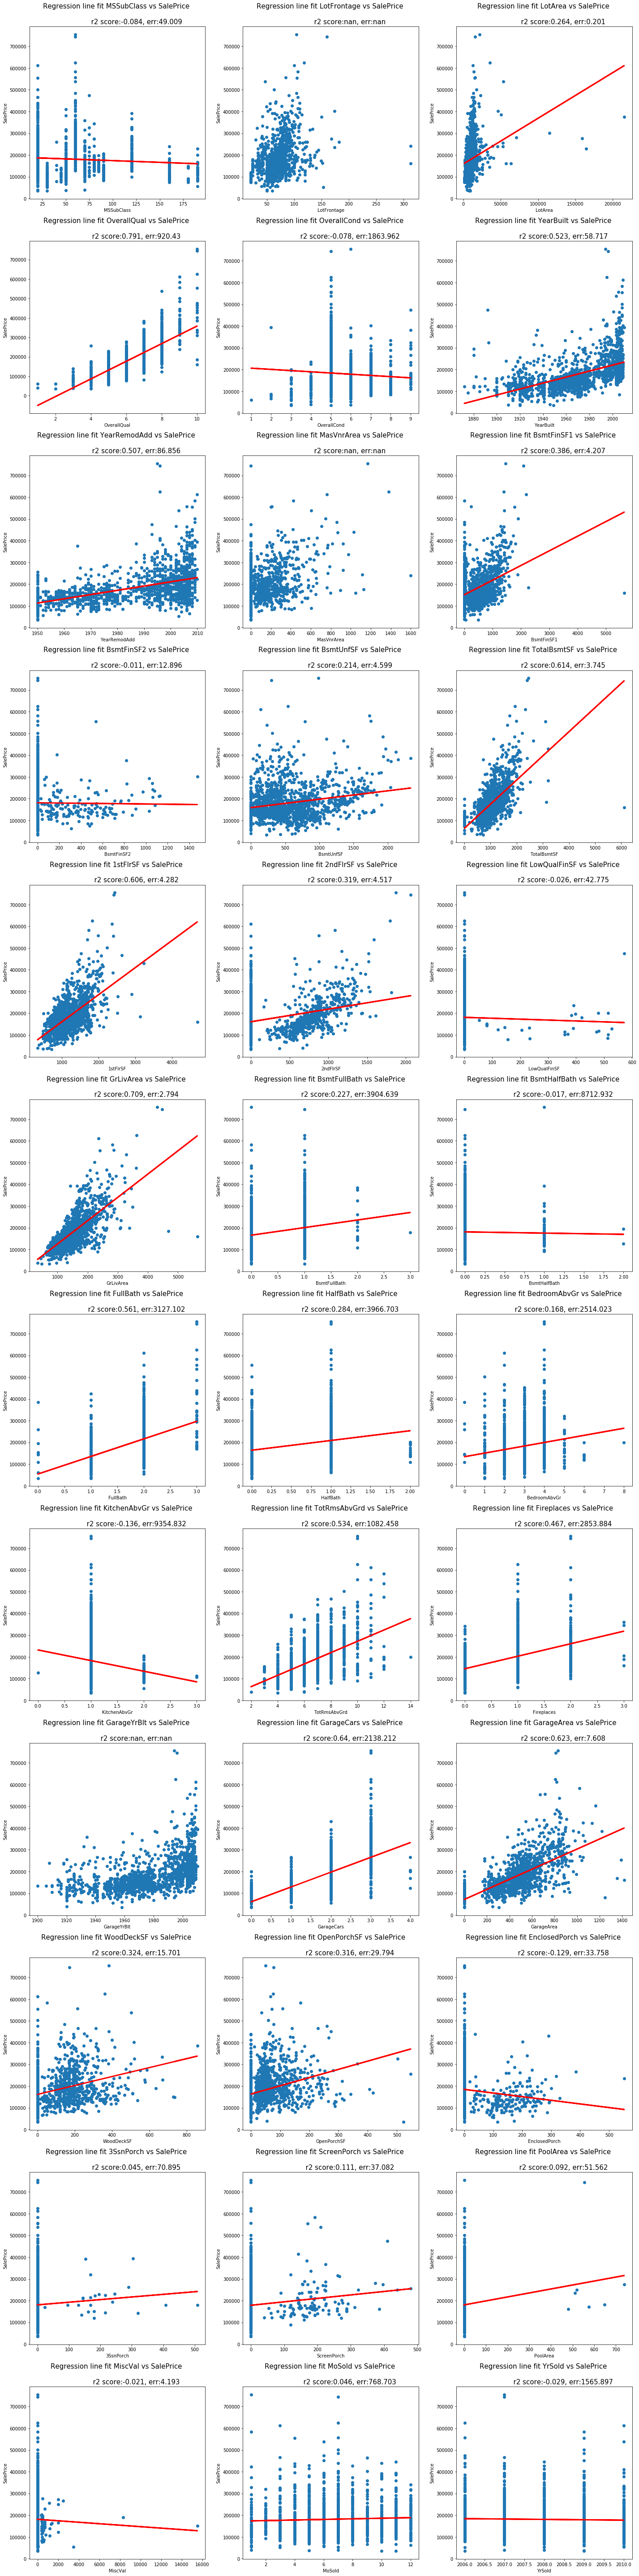

In [40]:
import matplotlib.pyplot as plt
from scipy import stats
n=1
target='SalePrice'
plt.subplots(nrows=12, ncols=3, figsize=(20, 80))
for col in numerical:
    plt.subplot(12,3,n)
    plt.scatter(train[col],train[target])
    slope, intercept, r_value, p_value, std_err = stats.linregress(train[col].astype(float),train[target])
    line = slope*train[col]+intercept
    plt.plot(train[col],line,color='red',linewidth=3)
    plt.title('''Regression line fit {} vs {} \n 
                  r2 score:{}, err:{}'''.format(col,target,round(r_value,3),round(std_err,3)),fontsize=15)
    plt.xlabel(col)
    plt.ylabel(target)
    n=n+1
plt.tight_layout()
plt.show()

# Problem 4:
Look up a beeswarm plot: https://seaborn.pydata.org/generated/seaborn.swarmplot.html

Repeat the same process as Problem 3 but this time with a beeswarm plot. You can ignore the part about fitting a regression line for this problem.

Use the parameters

`nrows=15
ncols=3
plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 100))`

for the subplots

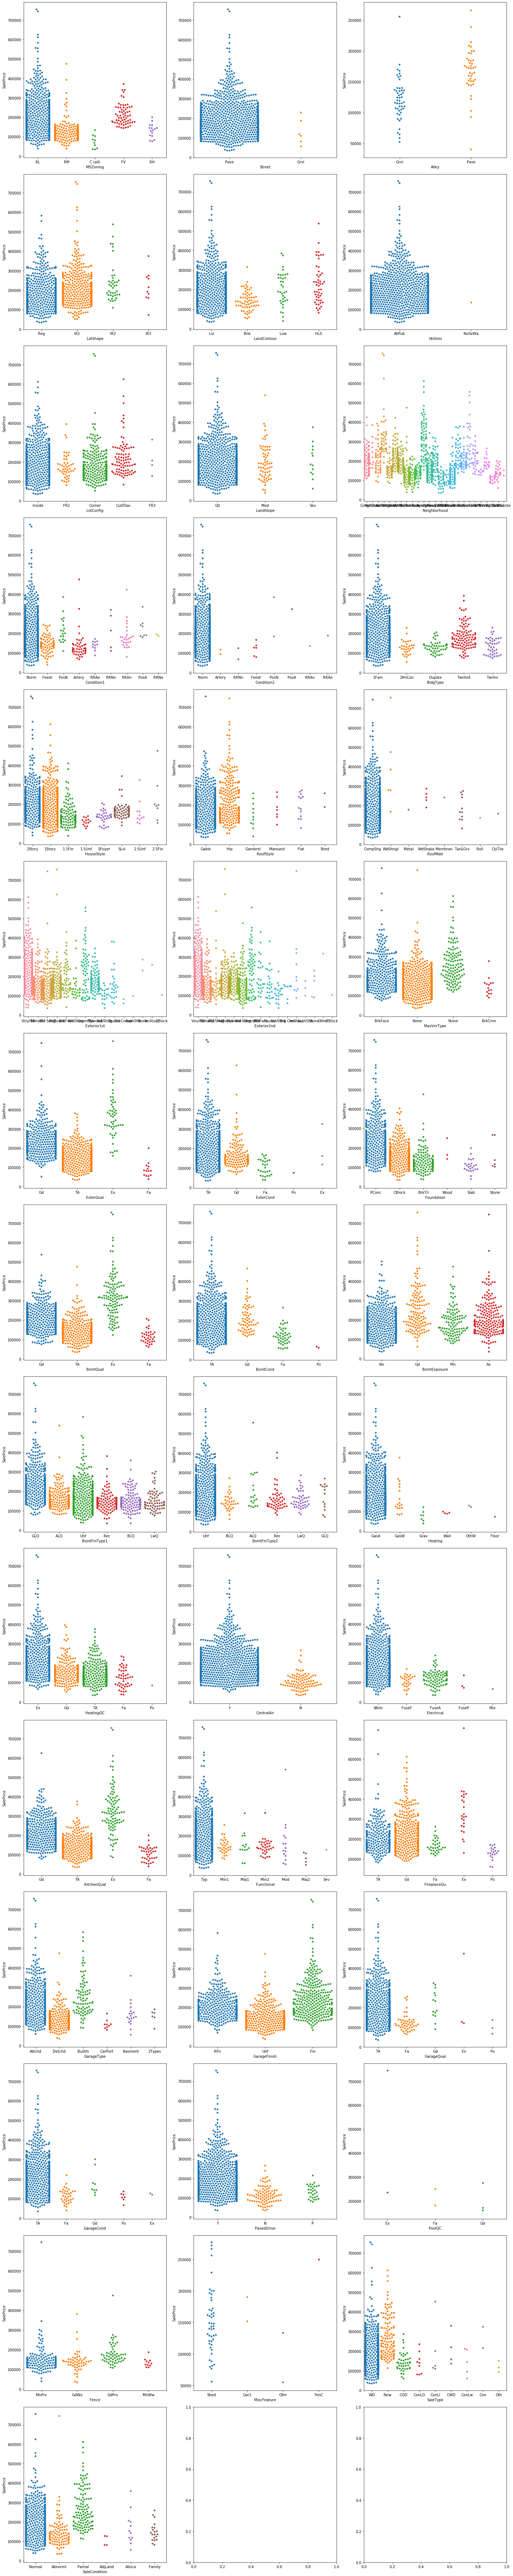

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
n=1
target='SalePrice'
nrows=15
ncols=3
plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 100))
for col in categorical:
    plt.subplot(nrows,ncols,n)
    sns.swarmplot(x=col, y=target, hue=None, data=train)
    n=n+1
plt.tight_layout()
plt.show()

# Problem 5 

For the categorical features, use the chi2 goodness of fit test to see if each feature is useful in predicting the regression value. Loop through all the features, and if the null hypothesis is not rejected, then append it to a list of useless categorical features. Use `alpha=0.01`. Remember to set up your observed values and expected values in a way that allows you to run the test correct;

HINT: 

`useless_categorical_features = []
for col in categorical:
    observed = list(train[[col,target]].groupby(col).sum().reset_index()[target])
    expected = [sum(observed)/len(observed) for i in range(len(observed))]`

In [49]:
from scipy.stats import chisquare,chi2
def chi_square_test_GOF(data,alpha,dof):
    observed = data[0]
    expected = data[1]
    chi_square_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
    chi_square_critical = chi2.ppf(1-alpha,dof)
    #print('chi_square_critical {}, alpha: {}'.format(round(chi_square_critical,4),round(alpha,4)))
    text = "chi_square_stat: {}, p_value: {}, dof: {}".format(round(chi_square_stat,4),round(p_value,4),dof)
    if (chi_square_critical<chi_square_stat) and (p_value<alpha):
        return "Reject Null hypothesis "+text
    else:
        return "Fail to reject "+text

In [65]:
useless_categorical_features = []
for col in categorical:
    observed = list(train[[col,target]].groupby(col).sum().reset_index()[target])
    expected = [sum(observed)/len(observed) for i in range(len(observed))]
    dof = len(observed)-1
    data = [observed,expected]
    print(chi_square_test_GOF(data,0.01,dof))
    if 'Fail' in chi_square_test_GOF(data,0.01,dof):
        useless_categorical_features.append(col)

chi_square_critical 13.2767, alpha: 0.01
Reject Null hypothesis chi_square_stat: 668853842.7165, p_value: 0.0, dof: 4
chi_square_critical 13.2767, alpha: 0.01
chi_square_critical 6.6349, alpha: 0.01
Reject Null hypothesis chi_square_stat: 261029614.1448, p_value: 0.0, dof: 1
chi_square_critical 6.6349, alpha: 0.01
chi_square_critical 6.6349, alpha: 0.01
Reject Null hypothesis chi_square_stat: 46452.7123, p_value: 0.0, dof: 1
chi_square_critical 6.6349, alpha: 0.01
chi_square_critical 11.3449, alpha: 0.01
Reject Null hypothesis chi_square_stat: 239779501.2077, p_value: 0.0, dof: 3
chi_square_critical 11.3449, alpha: 0.01
chi_square_critical 11.3449, alpha: 0.01
Reject Null hypothesis chi_square_stat: 584924720.3182, p_value: 0.0, dof: 3
chi_square_critical 11.3449, alpha: 0.01
chi_square_critical 6.6349, alpha: 0.01
Reject Null hypothesis chi_square_stat: 263595232.3011, p_value: 0.0, dof: 1
chi_square_critical 6.6349, alpha: 0.01
chi_square_critical 13.2767, alpha: 0.01
Reject Null hyp

# Problem 6: Do the same thing, with the one way ANOVA test

But is the `SalePrice` data normal (gaussian)? It may not be. Convert it to normality (for testing purposes) using the `numpy` function `np.log1p(data)` before putting the categorical features into the one way anova test.

Hint: 

some of the code includes

`for col in categorical:
    data = train[[col,target]].groupby(col)[target].agg(lambda x: list(x))
    test = one_way_anova(*data,alpha=0.01)`

In [78]:
from scipy.stats import f,f_oneway
def one_way_anova(*data,alpha):
    dfn = 0
    for j in data:
        dfn=dfn+1
    n_groups = dfn
    dfn = dfn-1
    total_elements = len([item for sublist in data for item in sublist]) #flatten data
    dfd = total_elements-n_groups
    F_stat,p_value = f_oneway(*data) #data is input as a list of lists
    F_critical = f.ppf(1-alpha,dfn,dfd)
    #print('F_critical: {}, alpha: {}'.format(F_critical,alpha))
    if F_stat>F_critical and p_value<alpha:
        return 'Reject Null hypothesis with F_stat:{} & P_value:{}'.format(F_stat,p_value)
    else:
        return 'Fail to Reject Null hypothesis with F_stat:{} & P_value:{}'.format(F_stat,p_value)

In [79]:
import numpy as np
train['SalePrice'] = np.log1p(train['SalePrice'])
useless_categorical_features = []
for col in categorical:
    data = train[[col,target]].groupby(col)[target].agg(lambda x: list(x))
    test = one_way_anova(*data,alpha=0.01)
    if 'Fail' in test:
        useless_categorical_features.append(col)
print(useless_categorical_features)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'BsmtFinType2', 'PoolQC', 'MiscFeature']
